In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from skbio.diversity import beta_diversity
import numpy as np
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import os

In [2]:
pckl = pickle.load(open('../results/batch_results.pickle', 'rb'))

In [3]:
biomtab=pckl['biom']
y=pckl['dat']['y']

In [4]:
biomtab

,00c246b120f5d923130e01c042aef3de,d46e2205f0c6ecf67b51f83d111c509c,c9512405c113abd640edd5472f8c1321,76692e4962da1e18060eaa39edd21281,11ff62f758f7c7e2e53e141ac7b9274d,bb7e5c6df18c100b97f890fc35eb2911,9580aa8a52ec18a4e92e701cdb595faa,4ebcf74b2783b601ceaf1ca7a994420a,65d43491988bfe557da4d86a5ba25dae,2eef049632564c8c90f7f53361789066,...,46994e329da4f3393a8495036589323a,ad9018f80e00f2ca4b48067195ac310d,19544923e054ae86ea199a63ae6ec2a7,6add585ceb4b4d22dc542a521200cdf1,a69fc10a7627cd4f499a260ae0623b36,7950b986622a877a28770aef4b4c4dd2,da4b2a4fa23c028aeec49d16e14f4425,02e2f53ad22208ea596141447c3d6d3f,f7c9419c72c8c7ce9ed3dfac71d70e2e,4b4603c0791b728f91a1c6211c11369e
3NW15021.run5,2910.0,4179.0,0.0,2226.0,63222.0,314.0,31331.0,4685.0,1294.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3NW15021B.batch,30822.0,130.0,17.0,0.0,176.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3NW15021A.batch,17533.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26BA054066B.batch,31284.0,0.0,155.0,0.0,165.0,1580.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26BA054066A.batch,15197.0,0.0,147.0,0.0,52.0,547.0,115.0,0.0,85.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6BAL9284.run3,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7NW21852A.batch,5426.0,790.0,0.0,0.0,144.0,3305.0,545.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7NW21852B.batch,6650.0,1078.0,0.0,84.0,148.0,4408.0,921.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09BL032006.20180323,865.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
fname = '../data/File_3_FerretMicrobiomeMetadata.xlxs.xlsx'
metadata = pd.read_excel(fname)

id_counts = metadata.sampleID.value_counts()
batches = id_counts.loc[id_counts>1].index
batch_metadata = metadata.set_index('sampleID').loc[batches]
batch_metadata = batch_metadata.reset_index()
batch_metadata = batch_metadata.set_index('SeqID')
batch_metadata = batch_metadata.loc[biomtab.index]

In [6]:
batch_metadata

,sampleID,runID,rundate,Experiment,Exp_short,SampleType,AnimalID,Days
3NW15021.run5,3NW15021,run5,20160426,CB1003,3,NW,1502,-2
3NW15021B.batch,3NW15021,batch,20180712,CB1003,3,NW,1502,-2
3NW15021A.batch,3NW15021,batch,20180712,CB1003,3,NW,1502,-2
26BA054066B.batch,26BA054066,batch,20180712,CB1026,26,BAL,4066,5
26BA054066A.batch,26BA054066,batch,20180712,CB1026,26,BAL,4066,5
...,...,...,...,...,...,...,...,...
6BAL9284.run3,6BAL9284,run3,20160318,CB1006,6,BAL,928,8
7NW21852A.batch,7NW21852,batch,20180712,CB1007,7,NW,2185,2
7NW21852B.batch,7NW21852,batch,20180712,CB1007,7,NW,2185,2
09BL032006.20180323,09BL032006,20180323,20180323,CB1009,9,BAL,2006,3


In [7]:
bc_dm = beta_diversity("braycurtis", biomtab.values, biomtab.index)
wu_bc = pcoa(bc_dm)

/mnt/home/dli/.local/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.385703284489808 and the largest is 23.225287569269604.
  RuntimeWarning


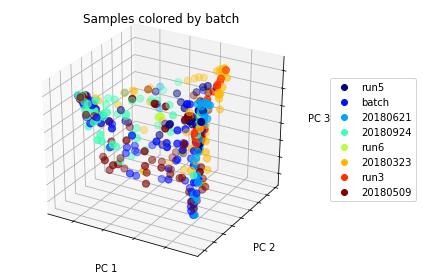

In [9]:
fig = wu_bc.plot(batch_metadata, 'runID', axis_labels=('PC 1', 'PC 2', 'PC 3'), title='Samples colored by batch', cmap='jet', s=50)

In [10]:
res=pckl['res']
lam = res['lam'].mean(axis=0)

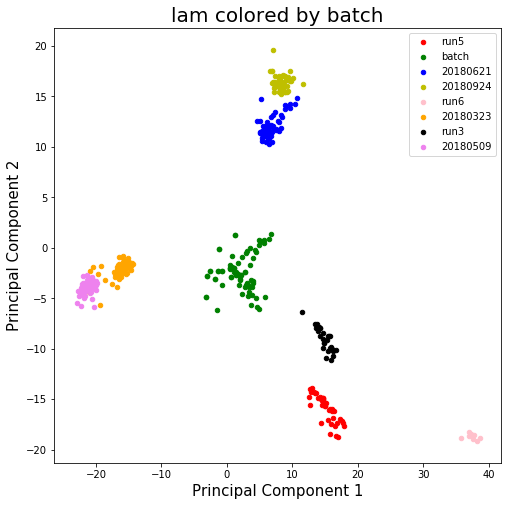

In [11]:
x = StandardScaler().fit_transform(lam)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, pd.Series(batch_metadata['runID'].values)], axis = 1)
finalDf.columns=['PC1', 'PC2', 'Batch']

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('lam colored by batch', fontsize = 20)

targets = finalDf['Batch'].unique()
colors = ['r', 'g', 'b', 'y', 'pink', 'orange', 'black', 'violet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Batch'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 20, label=target)
    
leg=ax.legend()

Subtracting gamma:

In [12]:
lam = res['lam'].mean(axis=0)
gamma = res['bdiff'].mean(axis=0)
batch_ids=pckl['dat']['batch_ids']

In [13]:
batch_corrected = np.zeros(lam.shape)
for n in range(lam.shape[0]):
    batch_corrected[n] = lam[n] - gamma[batch_ids[n]-1]

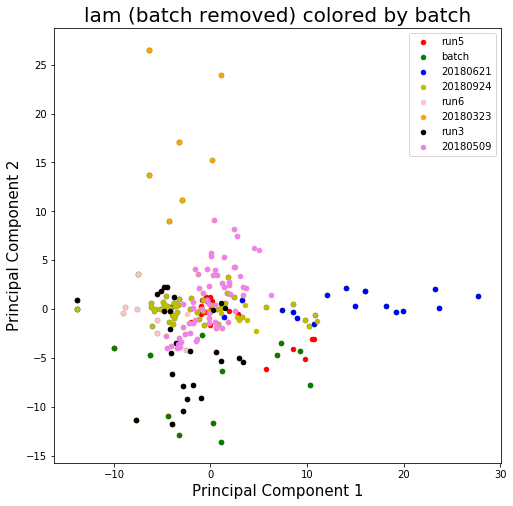

In [14]:
x = StandardScaler().fit_transform(batch_corrected)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, pd.Series(batch_metadata['runID'].values)], axis = 1)
finalDf.columns=['PC1', 'PC2', 'Batch']

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('lam (batch removed) colored by batch', fontsize = 20)

targets = finalDf['Batch'].unique()
colors = ['r', 'g', 'b', 'y', 'pink', 'orange', 'black', 'violet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Batch'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 20, label=target)
    
leg=ax.legend()